# 자동차 가격 예측 회귀 모델 (기준값 :R2)

In [1]:
# Data 연산
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 전처리 
from sklearn.impute import SimpleImputer # 결측치 처리
from sklearn.preprocessing import LabelEncoder # 라벨링
from sklearn.preprocessing import StandardScaler, MinMaxScaler # 표준화/정규화

from sklearn.model_selection import StratifiedKFold  # 편중 방지(cv 값 생성)
from sklearn.model_selection import train_test_split # 데이터 분할

# 모델
from sklearn.linear_model import LogisticRegression # 회귀 모델
from sklearn.metrics import accuracy_score # 모델 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 모델 평가

# ETC
import warnings # Deprecate Warning 제거
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../data/CarPrice_Assignment.csv')
df_raw = df.copy()
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


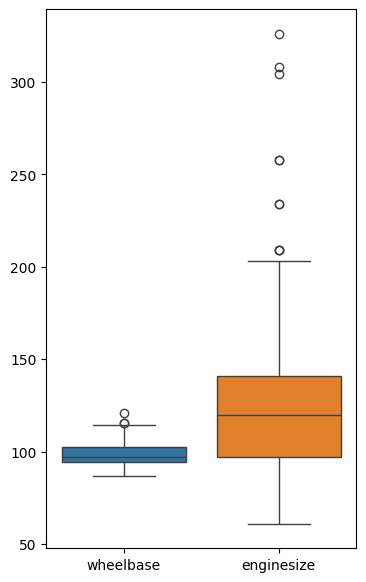

In [7]:
plt.figure(figsize=(4,7))
sns.boxplot(data=df[['wheelbase','enginesize']])
plt.show()

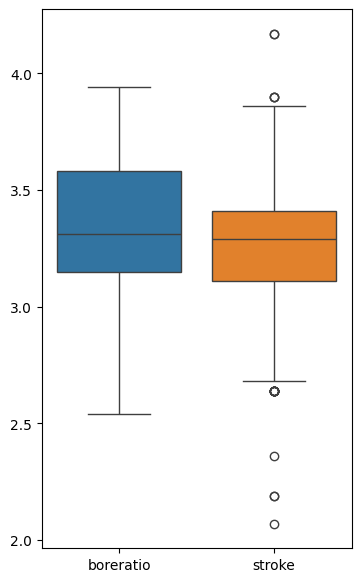

In [8]:
plt.figure(figsize=(4,7))
sns.boxplot(data=df[['fuelsystem', 'boreratio', 'stroke']])
plt.show()

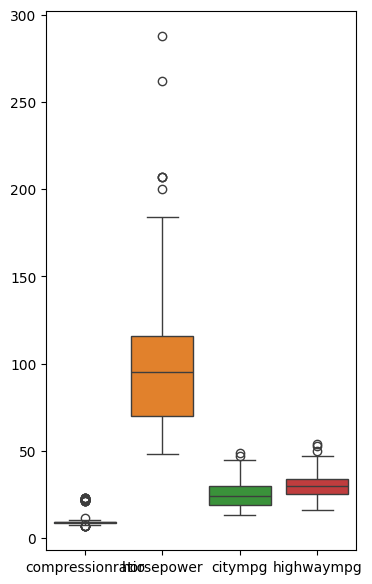

In [9]:
plt.figure(figsize=(4,7))
sns.boxplot(data=df[['compressionratio', 'horsepower', 'citympg','highwaympg']])
plt.show()

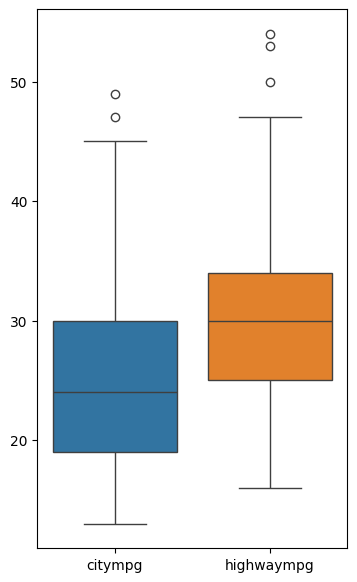

In [10]:
plt.figure(figsize=(4,7))
sns.boxplot(data=df[['citympg','highwaympg']])
plt.show()

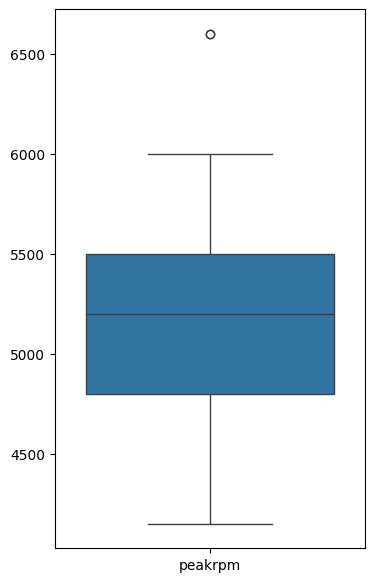

In [11]:
plt.figure(figsize=(4,7))
sns.boxplot(data=df[['peakrpm']])
plt.show()

In [12]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
def labeling_columns_simple(data_frame, columns):

    for column in columns:
        data_frame[column] = LabelEncoder().fit_transform(data_frame[column])

labeling_columns_simple(df, ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                             'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])

In [14]:
def remove_iqr_same(df, columns):
    
    df_clean = df.copy()

    ranges = []
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
    
        ranges.append((lower, upper))
    
    for index, col in enumerate(columns):
        lower, upper = ranges[index]
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean

In [15]:
remove_iqr_same(df, ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                     'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
10,11,2,10,1,0,1,3,2,0,101.2,...,108,5,3.50,2.80,8.8,101,5800,23,29,16430.0
11,12,0,10,1,0,0,3,2,0,101.2,...,108,5,3.50,2.80,8.8,101,5800,23,29,16925.0
19,20,1,25,1,0,1,2,1,0,94.5,...,90,1,3.03,3.11,9.6,70,5400,38,43,6295.0
20,21,0,26,1,0,0,3,1,0,94.5,...,90,1,3.03,3.11,9.6,70,5400,38,43,6575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,139,1,0,0,3,2,0,104.3,...,141,5,3.78,3.15,9.5,114,5400,23,28,12940.0
195,196,-1,138,1,0,0,4,2,0,104.3,...,141,5,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,140,1,0,0,3,2,0,104.3,...,141,5,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,141,1,0,0,4,2,0,104.3,...,141,5,3.78,3.15,9.5,114,5400,24,28,16515.0


In [16]:
# 데이터 분리
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
def evaluate_regression(y_pred, y_true):
    print("MSE:", mean_squared_error(y_pred, y_true))
    print("MAE:", mean_absolute_error(y_pred, y_true))
    print("R²:", r2_score(y_pred, y_true)) # 결정계수 : 1에 가까울 수록 설명력이 높음

In [18]:
# 선형 회귀 - 단순/빠름
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Linear Regression ===")
evaluate_regression(y_pred, y_test)

model.coef_ # feature와 결과값 간의 상관관계 확인 방법(음수도 값이 크면 역의 상관이 있는 것이 의미 있음)

=== Linear Regression ===
MSE: 12306121.302934594
MAE: 2087.306212322962
R²: 0.8157782951566881


array([ 1.96695473e+01,  1.66699545e+02, -5.51231065e+01,  9.87818467e+03,
        1.08184759e+03, -1.53977797e+03, -1.12767527e+03,  8.02669198e+02,
        1.15129385e+04,  1.75995013e+02, -6.15746881e+01,  5.80762644e+02,
        2.05252222e+02,  2.81201584e+00,  2.35693477e+02, -1.05010013e+02,
        7.87456838e+01,  1.02898868e+02, -7.38681211e+02, -1.95161560e+03,
        8.47219397e+02,  1.81854418e+01,  1.37307002e+00, -1.75134014e+02,
        1.05454430e+02])

In [19]:
# 릿지 회귀 - 과적합 방지 : 특정 가중치가 전체 결과값에 편향을 만드는 것을 막기 위해, 가중치 크기를 제어(L2 규제)
from sklearn.linear_model import Ridge

model = Ridge(alpha=2) # 가중치를 2로 제한
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Ridge Regression ===")
evaluate_regression(y_pred, y_test)

model.coef_ # feature와 결과값 간의 상관관계 확인 방법

=== Ridge Regression ===
MSE: 11616381.82883085
MAE: 2122.849441975554
R²: 0.8375137344928855


array([ 2.25593567e+01,  1.88163828e+02, -5.65458171e+01,  4.99243983e+02,
        2.92460463e+02, -1.63331637e+03, -1.34919696e+03,  7.60663751e+02,
        4.98356375e+03,  1.50097045e+02, -4.13125247e+01,  4.25623978e+02,
        3.05851878e+02,  1.80457342e+00,  3.24873753e+02,  3.28447775e+01,
        8.83175766e+01,  5.27571305e+01, -2.00651589e+02, -2.26860932e+03,
        2.59912459e+02,  3.29208496e+01,  2.08693484e+00, -2.08721441e+02,
        1.52661852e+02])

In [20]:
# 라쏘 회귀 - 변수 선택 가능 : 절대값의 합을 제어(L1 규제)
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1) # 절대값의 합을 0.1로 제한
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Lasso Regression ===")
evaluate_regression(y_pred, y_test)

model.coef_ # feature와 결과값 간의 상관관계 확인 방법

=== Lasso Regression ===
MSE: 12291672.751748666
MAE: 2086.818417813635
R²: 0.8160403731923628


array([ 1.97247940e+01,  1.66350823e+02, -5.51772717e+01,  9.74381632e+03,
        1.07094912e+03, -1.53899883e+03, -1.12803961e+03,  8.01398705e+02,
        1.14974991e+04,  1.75724181e+02, -6.13991680e+01,  5.81030543e+02,
        2.05392555e+02,  2.80612006e+00,  2.35442898e+02, -1.02358704e+02,
        7.87729213e+01,  1.02510031e+02, -7.35780519e+02, -1.95590773e+03,
        8.37885363e+02,  1.82715531e+01,  1.37754942e+00, -1.74747652e+02,
        1.05497870e+02])

In [21]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== LGBMRegressor ===")
evaluate_regression(y_pred, y_test)

model.feature_importances_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 23
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

array([21,  0, 38,  0,  0,  0,  0,  8,  0, 14, 19, 21,  3, 31, 12,  0, 43,
        3, 18, 16, 16, 50, 24, 12, 17])

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== RandomForestRegressor ===")
evaluate_regression(y_pred, y_test)

model.feature_importances_

=== RandomForestRegressor ===
MSE: 3380659.5638357075
MAE: 1303.8131219512195
R²: 0.9558239168549426


array([1.56992878e-02, 5.40296609e-04, 9.80012426e-03, 1.75272647e-04,
       5.83567981e-04, 3.72754199e-04, 1.68399407e-03, 8.22274451e-04,
       1.92993524e-05, 6.11565449e-03, 7.78421749e-03, 1.20765350e-02,
       2.87921063e-03, 2.90457410e-01, 9.89232698e-04, 4.64527814e-04,
       5.56389053e-01, 1.90803406e-03, 3.92237929e-03, 4.27743259e-03,
       2.22508764e-03, 2.66625794e-02, 4.57213912e-03, 5.17665886e-03,
       4.44029766e-02])